### Introduction
This notebook demonstrates a neural network with LSTM Layer to classify the short german phrases.(Just a try!).


*   Loaded data with Pandas DataFrame.
*   Preproccessed Data as same as SVM and Navie Bayes.
*   Performs Tokenization to convert text to indexes.
*   Added Padding to have same length of input.
*   Handling Labels with One-Hot Encoding.
*   Splitting the dataset.
*   Model Building and Compiling.
*   Model Training.
*   Model Evaulation.

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Data Loading

In [2]:
# Load the dataset
file_path = 'sample_data.csv'
df = pd.read_csv(file_path)


### Data Pre-Processing

In [3]:
import re
import nltk
from nltk.stem.snowball import GermanStemmer


nltk.download("punkt")


def preprocess_german_text(text: str) -> str:
    """This function preprocess the german phrases,
    It takes a string `text` as input and returns a preprocessed text."""

    # Convert to Lowercase
    text = text.lower()

    # Handle German umlauts and special characters
    replacements = {"ä": "ae", "ö": "oe", "ü": "ue", "ß": "ss"}
    for k, v in replacements.items():
        text = text.replace(k, v)

    # Remove E-Mails
    text = re.sub(r"\S+@\S+", "", text)

    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Remove punctuation and special characters
    text = re.sub(r"[^\w\s]", "", text)

    # Tokenization
    tokens = nltk.word_tokenize(text, language="german")

    # Stemming
    stemmer = GermanStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    return " ".join(stemmed_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
df['processed_text'] = df['text'].apply(preprocess_german_text)

### Tokenisation

In [5]:
# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['processed_text'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df['processed_text'])
padded = pad_sequences(sequences, padding='post')

### Handling Labels

In [12]:
# Handling Labels with One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(df[['label']])

### Splitting the DataSet

In [13]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

###  Model Building and Compiling

In [21]:
# Model Building
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64, input_length=padded.shape[1]),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(labels.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Model Training

In [22]:
# Model Training
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
933/933 [==============================] - 94s 96ms/step - loss: 0.7448 - accuracy: 0.7339 - val_loss: 0.4144 - val_accuracy: 0.8675
Epoch 2/10
933/933 [==============================] - 87s 94ms/step - loss: 0.3076 - accuracy: 0.8889 - val_loss: 0.3329 - val_accuracy: 0.8791
Epoch 3/10
933/933 [==============================] - 89s 95ms/step - loss: 0.2504 - accuracy: 0.9068 - val_loss: 0.3289 - val_accuracy: 0.8822
Epoch 4/10
933/933 [==============================] - 93s 99ms/step - loss: 0.2280 - accuracy: 0.9130 - val_loss: 0.3240 - val_accuracy: 0.8832
Epoch 5/10
933/933 [==============================] - 88s 94ms/step - loss: 0.2135 - accuracy: 0.9172 - val_loss: 0.3229 - val_accuracy: 0.8826
Epoch 6/10
933/933 [==============================] - 88s 95ms/step - loss: 0.2032 - accuracy: 0.9213 - val_loss: 0.3253 - val_accuracy: 0.8816
Epoch 7/10
933/933 [==============================] - 89s 95ms/step - loss: 0.1944 - accuracy: 0.9233 - val_loss: 0.3283 - val_accuracy:

### Accuracy Evaluation

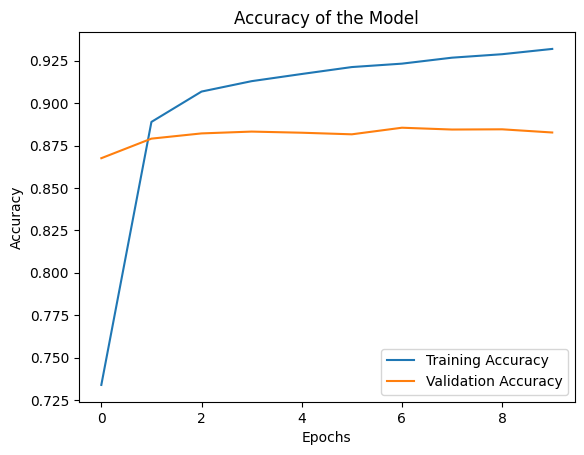

In [25]:
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'] , label='Validation Accuracy')
plt.title('Accuracy of the Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Tried with different output dimension

In [55]:
# Model Building
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32, input_length=padded.shape[1]),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(labels.shape[1], activation='softmax')
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [57]:
# Model Training
model_1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
933/933 [==============================] - 40s 43ms/step - loss: 1.6839 - accuracy: 0.2934 - val_loss: 1.6889 - val_accuracy: 0.3014
Epoch 2/10
933/933 [==============================] - 38s 40ms/step - loss: 1.6831 - accuracy: 0.2985 - val_loss: 1.6886 - val_accuracy: 0.3014
Epoch 3/10
933/933 [==============================] - 38s 40ms/step - loss: 1.6828 - accuracy: 0.2970 - val_loss: 1.6868 - val_accuracy: 0.3014
Epoch 4/10
933/933 [==============================] - 38s 41ms/step - loss: 1.6830 - accuracy: 0.2974 - val_loss: 1.6861 - val_accuracy: 0.3014
Epoch 5/10
933/933 [==============================] - 40s 42ms/step - loss: 1.6826 - accuracy: 0.2982 - val_loss: 1.6854 - val_accuracy: 0.3014
Epoch 6/10
933/933 [==============================] - 37s 40ms/step - loss: 1.6824 - accuracy: 0.3006 - val_loss: 1.6855 - val_accuracy: 0.3014
Epoch 7/10
933/933 [==============================] - 38s 41ms/step - loss: 1.6825 - accuracy: 0.2996 - val_loss: 1.6862 - val_accuracy:

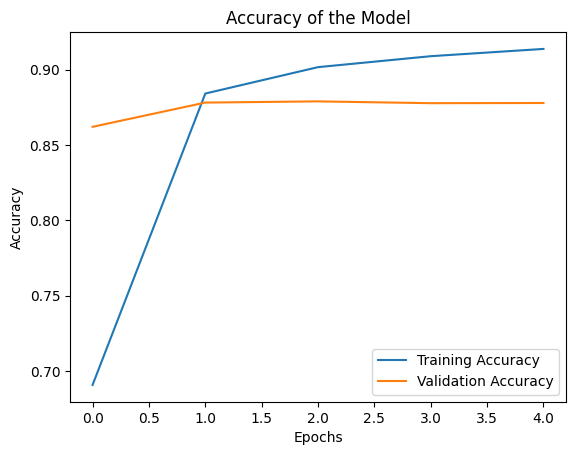

In [28]:
plt.plot(model_1.history.history['accuracy'], label='Training Accuracy')
plt.plot(model_1.history.history['val_accuracy'] , label='Validation Accuracy')
plt.title('Accuracy of the Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def predict_text(text: str) -> str:
    processed_text = preprocess_german_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=padded.shape[1], padding='post')
    prediction = model.predict(padded_sequence)
    predicted_label = encoder.inverse_transform(prediction)[0][0]
    return predicted_label


In [58]:
padded.shape[1]

93

In [51]:
# Predicting the test dataset
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoding
y_test_indices = np.argmax(y_test, axis=1)

y_pred_labels = encoder.inverse_transform(y_pred_probs).flatten()
y_test_labels = encoder.inverse_transform(y_test).flatten()
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_labels.astype(str), y_pred_labels.astype(str)))


234/234 [==============================] - 6s 26ms/step
              precision    recall  f1-score   support

          ch       0.95      0.83      0.88       733
         cnc       0.90      0.72      0.80       527
          ct       0.95      0.89      0.92      1031
          ft       0.88      0.94      0.91      2248
          mr       0.86      0.85      0.85      1018
         nan       0.86      1.00      0.93        19
         pkg       0.84      0.89      0.86      1883

    accuracy                           0.88      7459
   macro avg       0.89      0.87      0.88      7459
weighted avg       0.88      0.88      0.88      7459



In [52]:
import json
# saving the token indexing
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))


In [60]:
model.save("German_Text_Classification_LSTM_NN.h5")


In [59]:
import joblib
joblib.dump(encoder, 'encoder.joblib')


['encoder.joblib']

### Conclusion
All the 3 Models Performs at same level of accuracy by comparing the Classification Report.